## Image Processing and Analysis in Python with OpenCV
Welcome! After completing this lab you will:
1. Learn to download, read and display images using Python, OpenCV and Matplotlib
2. Learn to apply various Image Processing techniques using Python and OpenCV
3. Understand about the importance of various Image Processing techniques
4. Analyze images using Histograms

In [1]:
import cv2
print(cv2.__version__)

4.5.5


## Downloading and plotting images in Python using OpenCV and Matplotlib
### Download an image
Let's first download an image, using the urllib package. We'll need to specify a url of an image and a filename.

We'll be downloading the following image of Donald Trump and Justin Trudeau, the President of the U.S. and Prime Minister of Canada, respectively. 

In [2]:
import requests
import urllib

In [3]:
import urllib.request

In [4]:
#Set the url and filename
trumptrudeau_url = "https://upload.wikimedia.org/wikipedia/commons/thumb/e/ee/Donald_Trump_and_Justin_Trudeau_in_the_Oval_Office_-_2017.jpg/640px-Donald_Trump_and_Justin_Trudeau_in_the_Oval_Office_-_2017.jpg"
trumptrudeau_filename = "trumptrudeau.jpg"


urllib.request.urlretrieve(trumptrudeau_url, trumptrudeau_filename) # downloads file as "trumptrudeau.jpg"

('trumptrudeau.jpg', <http.client.HTTPMessage at 0x1fda86099d0>)

## Verify that the image has downloaded

At this point, you should now see the file listed in the files directory in the left-sidebar of the JupyterLab environment. If this side menu is hidden, you can go to View>View Left-Sidebar.

Alternatively, you can run the command below to check the files in your current directory:

In [5]:
import os
os.listdir(os.curdir) #shows all files in current directory

['.ipynb_checkpoints',
 'cat.jpg',
 'Converted Gray Scale',
 'trumptrudeau.jpg',
 'Untitled.ipynb']

In [6]:
#Is trump_filename in your directory?
print(trumptrudeau_filename in os.listdir(os.curdir))

True


## Plotting images in Jupyter Notebooks

Next, let's display the image into this notebook, using OpenCV. We'll also be borrowing from the plotting library, matplotlib, to help display the images.

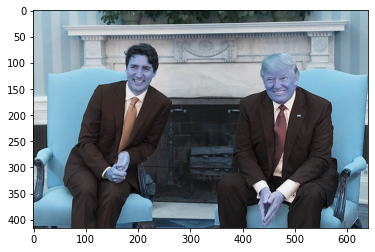

In [7]:
from matplotlib import pyplot as plt
%matplotlib inline

trumptrudeau = cv2.imread(trumptrudeau_filename)

plt.imshow(trumptrudeau)

## Image Processing using OpenCV
Hm... the Presidents are looking a little blue in the above photo, wouldn't you say?

### Fix colors when displaying images

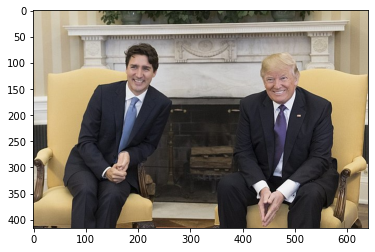

In [8]:
img_corrected = cv2.cvtColor(trumptrudeau, cv2.COLOR_BGR2RGB)

plt.imshow(img_corrected)

## Remove the axes around the image

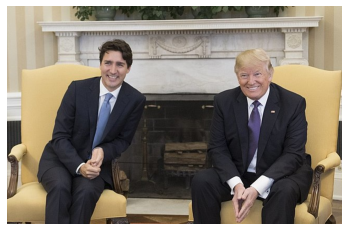

In [9]:
plt.axis("off") #remove axes ticks
plt.imshow(img_corrected)

## Change the size of the displayed image in the notebook

Note that this simply changes the display size of the image, not the actual image dimensions

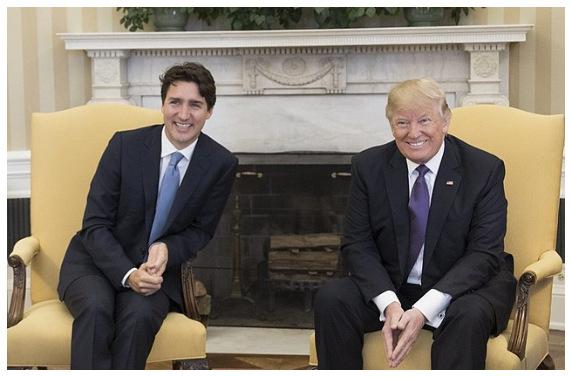

In [10]:
from pylab import rcParams

rcParams['figure.figsize'] = 10, 12

plt.axis("off") #remove axes ticks
plt.imshow(img_corrected)

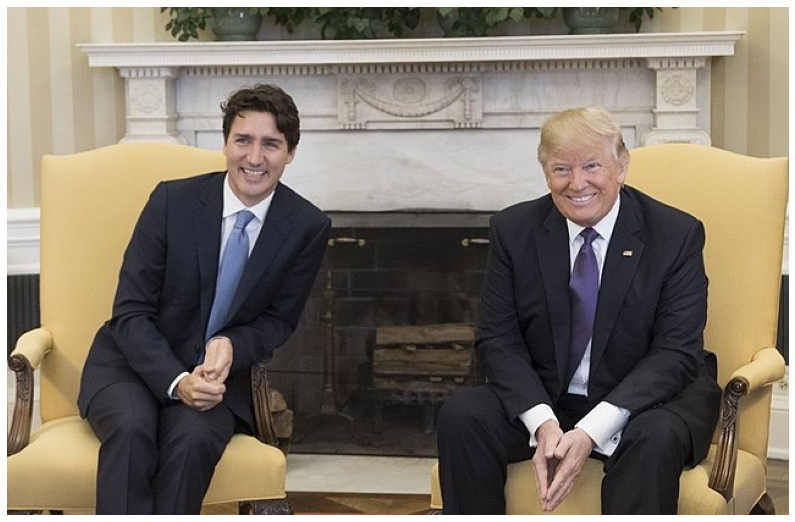

In [11]:
rcParams['figure.figsize'] = 14, 20

plt.axis("off") #remove axes ticks
plt.imshow(img_corrected)

## Convert to Grayscale

Text(0.5, 1.0, 'Grayscale Image')

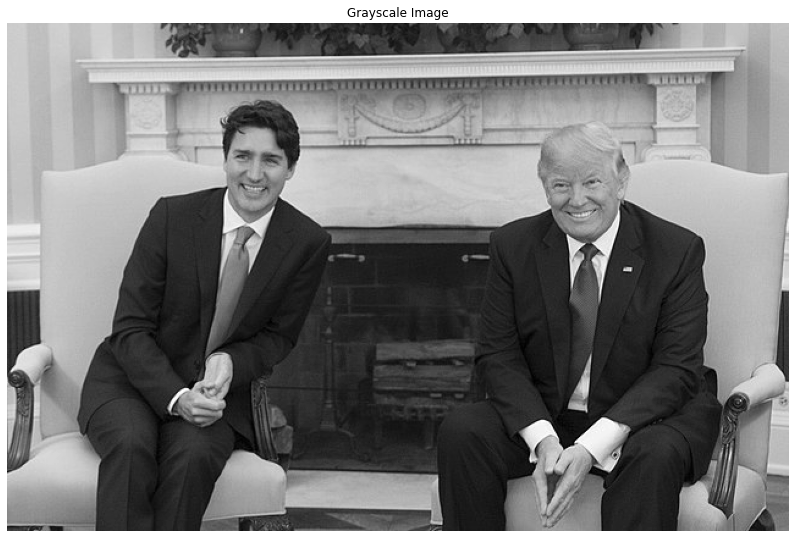

In [12]:
gray_trumptrudeau = cv2.cvtColor(trumptrudeau, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_trumptrudeau, cmap = 'gray')
plt.axis("off") #remove axes ticks
plt.title('Grayscale Image')

## Canny Edge Detection

Canny Edge Detection is an algorithm used to detect edges in an image, and was developed by John F. Canny in 1986.
Full OpenCV documentation on Canny Edge Detection: here

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

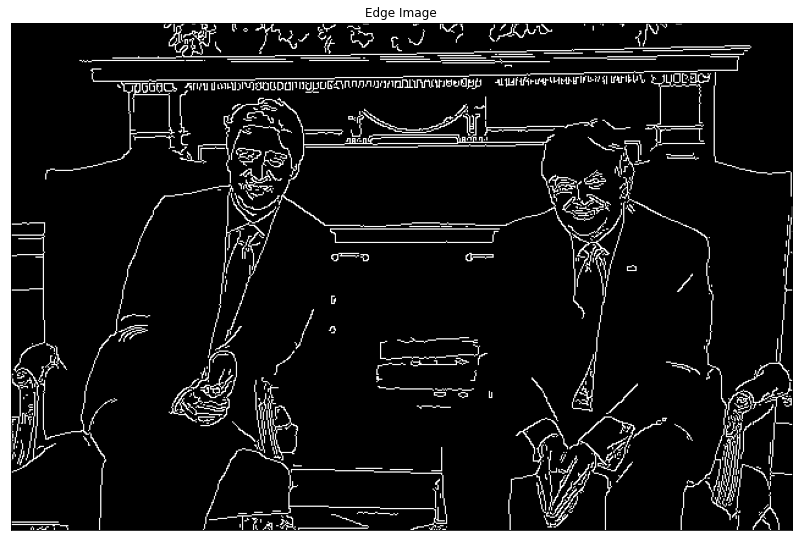

In [13]:
rcParams['figure.figsize'] = 14, 20


edges = cv2.Canny(img_corrected, 
                  threshold1=100, 
                  threshold2=200)

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

## Try different levels of threshold:

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

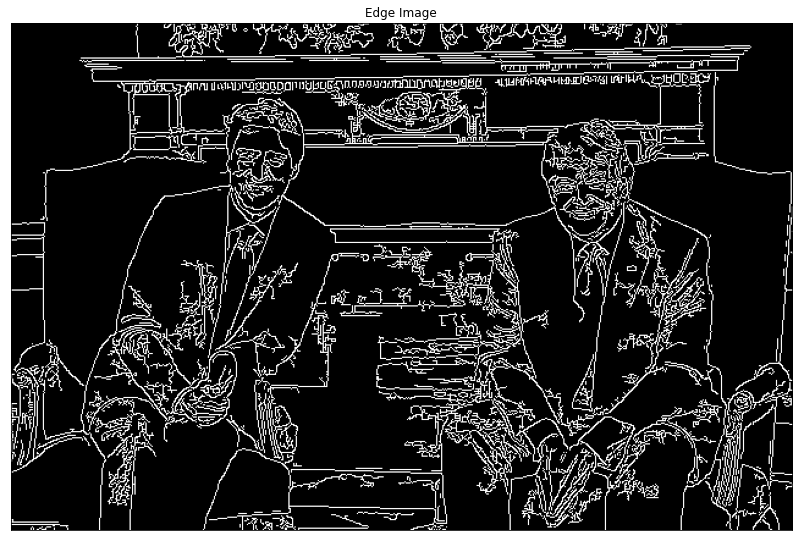

In [14]:
rcParams['figure.figsize'] = 14, 20

edges = cv2.Canny(img_corrected, 
                  threshold1=1,   ## try different values here
                  threshold2=200) ## try different values here

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

(Text(0.5, 1.0, 'Edge Image'), ([], []), ([], []))

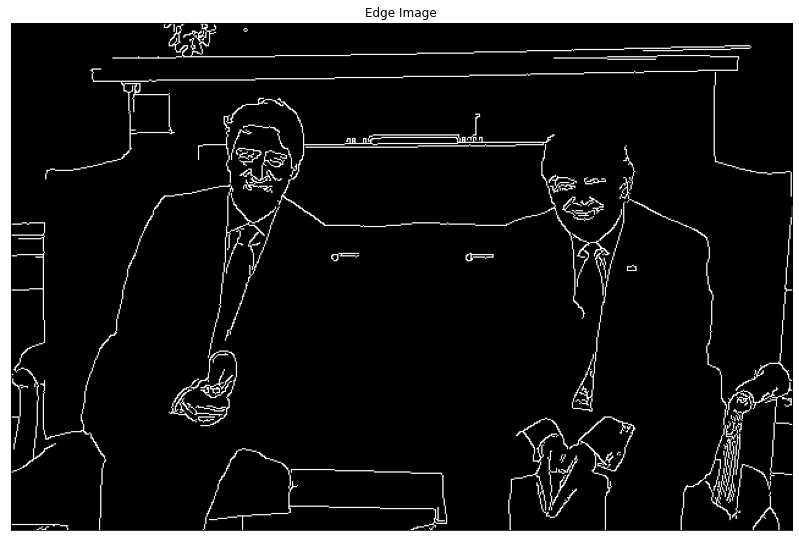

In [15]:
rcParams['figure.figsize'] = 14, 20

edges = cv2.Canny(img_corrected, 
                  threshold1=100,   ## try different values here
                  threshold2=500) ## try different values here

plt.imshow(edges,cmap = 'gray')
plt.title('Edge Image'), plt.xticks([]), plt.yticks([])

## Want to know the parameters of a function?

Try using a question mark ? before a method to display the help doc for the method.

In [16]:
# ?cv2.Canny

## Analyzing Images using Histograms

### Histograms - Grayscale

Histograms allow you to quickly determine the number of pixels that are on a scale "black pixel" (0) to "white pixel" (255).

Execute the code cell below to see the histogram of the image of President Trump and President Trudeau:

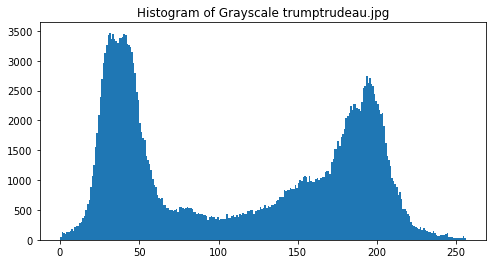

In [17]:
import cv2
import numpy as np
from matplotlib import pyplot as plt

rcParams['figure.figsize'] = 8,4

plt.hist(gray_trumptrudeau.ravel(),256,[0,256])
plt.title('Histogram of Grayscale trumptrudeau.jpg')
plt.show()

## What's in the histogram?

Like any other histogram, this graph shows the count of something. In this case, it's the number of pixels in the image that are either dark (towards the left of the graph) or lighter (towards the right of the graph).

### Why are histograms important?

- If you're concerned about whether the image is properly exposed (not too dark and not too bright), then histograms are a great way of checking the distribution of your lighter and darker pixels!
- If your images are overexposed (too bright) or underexposed (too dark), you can fix exposure with OpenCV in Python (although you may lose some image quality).
- This might be important if you're developing an app where users are taking photos and your app is trying to classify the objects inside the image. If it's too dark or too light, the objects may not be recognizable.

### How do you read the histogram?

- On the x-axis, the values normally range from 0 (black) to 255 (white). So darker pixels are on the left, and whiter pixels are to the right. In the matplotlib chart above, the x-axis goes from 0 to 256, since each pixel is represented as a bin start from 0 to 0.99, and ends with 255 to 255.99.
- The y-axis shows the number of pixels found in the image on the scale of black to white.

## Observations: The grayscale histogram above shows that:

- lots of pixels around x = 30, which are darker pixels.
- lots of pixels around x = 200, which are lighter pixels.

### Interpretation:

- the image appears to have lots of very dark, and very light pixels, but not a lot of pixels in between. Looking at the image of the Presidents, this is readily apparent -- the darker pixels seem to come from the black suits and the fireplace. A lot of the lighter pixels come from the furniture and walls.

### Histograms - Color scale (RGB)

### Interpreting RGB histograms
Like grayscale histograms, RGB also shows the count distribution of pixels from black (x=0) to full color (x=255).

Here is a color image of the presidents:

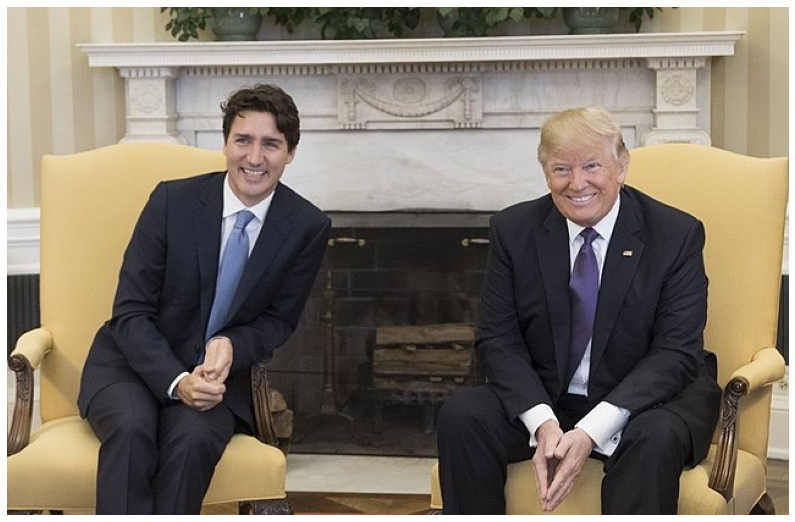

In [18]:
rcParams['figure.figsize'] = 14, 20

plt.axis("off") #remove axes ticks
plt.imshow(img_corrected)

And the following is an RGB histogram for the above image

## RGB histogram

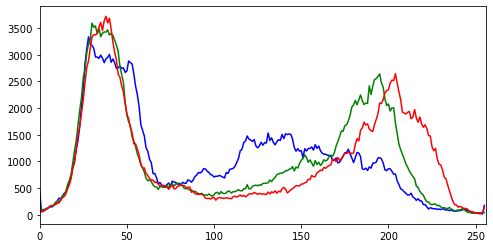

In [19]:
rcParams['figure.figsize'] = 8, 4

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([trumptrudeau],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()

In the histogram above, you can observe that:

- of the lighter pixels (around x >= 200), there are more red pixels than green or blue pixels. This is likely because of the redness in the faces of the presidents.
- there seems to be a similar amount of dark red, dark blue, and dark green pixels (around x<50)
- in terms of middle-tones, there seems to be more blue pixels than green or red. This is likely because of the neckties worn by the presidents.

## Exercises

### Exercise 1

1.1. Download an image of your choosing, and display it
1.2. Convert the image to grayscale, and display it

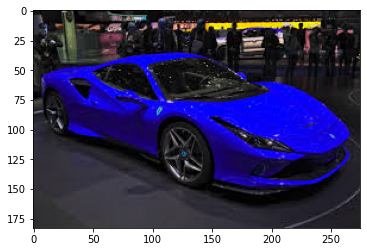

In [20]:
# 1.1. Download an image of your choosing and display it

# Write your code below:

download_image_url = "data:image/jpeg;base64,/9j/4AAQSkZJRgABAQAAAQABAAD/2wCEAAkGBxMTEhUTExIWFRUXFxUWFhcXFxYXGBcYFxcWFxcVGBcYHiggGBolHRcWITEhJSkrLi4uFx8zODMtNygtLisBCgoKDg0OGxAQGy0lICUtLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLS0tLf/AABEIALcBEwMBEQACEQEDEQH/xAAbAAACAwEBAQAAAAAAAAAAAAADBAECBQAGB//EAEEQAAEDAgQDBgQEBAUBCQAAAAEAAhEDIQQSMUEFUWETInGBkaEGMrHBQlLR8BQz4fEVI1NikqIHFiRDcoKywuL/xAAbAQACAwEBAQAAAAAAAAAAAAAAAQIDBAUGB//EAD0RAAIBAgMECAUCAwgDAQAAAAABAgMRBCExBRJBUQYTYXGBkaHRFCIyscHh8DNCUhYjQ1NyktLxYoLiFf/aAAwDAQACEQMRAD8A+aUOCl4ID7gEgRqQJA130QsxuLMguTEUeUAer4nxOpVZRD3S0Zw0QGgFhhkZRaGn6pIqjFJs89xeoRXzm8tYT17uUn2lMnHQH2ran4YhBIPh8PT3A80ANsp02OBDGmIMag8xdOSA2KXwrSrMNVuanqcrXy0RyzMn3RGEmnZ6DUWxen8NhtVtJpquc7T/AC2u1kbOBixvCi96LzsJ3NCh8C1cQ4tpvJLSQe43aNCagnUHzSqScJbrtfv/AEIp3djsb/2eYii0ufUc0Ma54GQGAMzjlAqH8pWaeLjBpS4tLzy5F0acpaHhJWsrNDheDxDpfSa8NggvEtbEGWl+mk2Sur2JbravbIbNPEMnNiQ0xBHam4IFoHNSaaIiVfF1HiHVHuEyAXOIBsJgnWyQEjG1T81V5EyZc4zzm907sLFsTi6tWA976gbpmLnQOQnRJgkBLz5XAsNCSYmL6osBLKnOZ5ybc0JASaliIvMzvGw+vqiwE0KxB11EJoAzazenoh2Ajt280WQECs3TN9UvACWPa7UmJiYJ+nmh9wyHVgDAk+RlNCIFfx9CmBbO2471te59bqNnyDIhtQnRpNwLNOp0Hj0TsFyz5DgC1zTGjmkE+RUWuIwb6BFy08/IwdujmpX4CutBhxsAGn0P3UgAmfylAxc0D1QI3zjXUoc0AmRrcDrA1UEWydl++Rk43ABrWVA6Q8vtBERGnMX/AOkp3FuLc3u2xGFwVBzCX1nteCRlawOkQIMkhX06Smrt2KJ1N12PUcAwNOvRfTeC5ocCDoflbe2irkrOyKJzcWmZHxJgKXbDM4saKbQMrQ6AC4aSOiIpPUtpydhWhwaiWl7cS/eAKUuMcgHK3q4f1ehO75DGC+EsRUvnyN2z/P8A8WzHqprCTeeneLrImZQwNV9QU6by5+kaRBi55byqLN5InbM9ngPhM5ABjK1tm90TF8oNyO9rpdXKl2jPPcfrV8NWdSFWtPdAL3Q6Is62g5dFTN52EOV+KhtOadSr2gBEuc9zTILSYP4ocYjoqtXmWWSSa1M7AUMRi3xnf3Gky4kNa1omSep/dlONNydkKUnJ3HvhTg+Gr9p274LIPz5BlMDzMyrKMYyb3iVodX239LL9QWNxr6TnUabz2YJawSYLRIb42PuqJJb2RYptRtwI4FQNavSoEAbkuYSAGg1DmGhHd35q6hT6yoo82Zqk9yDfI1m8ApZsUKlRlI0T2QzdmO0zSQ5nds+0yJIB9dsKVJuSd8n++7TtKb1MtM/3+9AuH4DQfmb27cjGOIeG0oIyloJcW3uLHWTOpQqFO9+Fr/juHKUkvI81xLEBpfSo1P8ALmc0ATuTAtEyAufUUd/5dC+Le7Zm5R4PgGU6LsTWqtNRgIDA2ObnOIYTEnUnpoLdR0sPCEHN6r25Z+p5yrjNo1KtSGGhFqDaz17Frmzcx3wFg6NN1SpVrhrRmLpYSB4Bl/RWvCUYRbk33/tfg5FDpBja9SNOnGN3lbP/AJAeIfCGBosJNaoH5C5rXVKYL7S3ulvMbRulUoUIR1z79S/DbX2jiJ/LTTjezai3bnncQ+BOAU8Qx9SqHd12VsZchEBxEOBkgn3VOCowqxbmuJt23tOtg6sYUms1d3V3qa9f4YwDZY+qZsYNUZhEDQX5BapUMLD6nbvZgw+0drYlpUabl3QbBf8Adzhmmc7/APmuHqqX8Cst5ebOksP0kefUPxil6MIOC8LbA7VozAd3tz3oixbN7gW3TXwTzTVl25eRmqR6QQkqcqTvLJfKrjjOBYIBvfdDwxrR29SCG95gjNbLEjkQmqeFySz4a3/Jmq4vbVPe34SjbN3hbTLijPdW4Iwuziu+qSGuc19c5pETnzXaBY38isVZ04ztDTLn97nfwKxNTDqVdtSd8rRWV+Vhyhw/hZD6NJzS9ofNMV6zQ50AuHzAvEtAmNui0xjRkrbuavlfM4eNrbTw9Vbs3KErfMoppZ91r/czPhDC4SvSNXE06baj3ua0CrVBe0NbMtNQlxlxBJ1m6rpOEob00l9si/aUsfSxPVYaU5RSTk91O12+UVw4GzxDD8JwwBdla5xzBje1eS4SA7KDAi8O22Uusop3aRGhR2pO16kl2bqXmfOvicMdjH9lHZOyhhDi5sZWgmTfWViq7rm9zQ9DhIVadFKs96Wd3zzdvSxmV6ORw7wdbUKk1DFam5nztIJ0B0I5zuh8xkNLDa/tEX6IAguAtE+Y/RILDj+JZYgeOmm/gi10O9mMY7GCtSpAyWtNQsvJv2YdA/CJbpHNEIWTy5fkJyuDwWEpus2xFzMe1k3chfmen+G6XZVatMnQMPjII+yRlru6TQnx8EVAQdQ4e+vjdSk+RZQtbMxmVCy1yb3JMibWI0S3ne5floL1HG5BcCYkhxk+JOqkpzb1ZHdjyNHgmFfSeKtOo5jxBm0c7jRw6EFaaeHbzuWqJq/4hiKgP/iCAYbDWMYAG6Na1rQAOgCsjQuspAoGXiYfXnFOfVblcXnNDyGNJAzeMBZqlPcdmyLVjPqUHU8peACRIAgxA0I22VLiSU2s0D4nxOo6kGdo7swQMmYxoYGXTKOSlvO1r5EHm7mfTJsJgG5URoaxboDb6tnw71vZIm9C3Dq5NRozObILQWkggkQCCFJNrQg89TsHja9Co/K8h1w4GHBx0Mh1ieuqlCpKDumV1Kcakd2Sun++GYzxLimI7IUqhyt0DYDfk+WYEnnJ5AqTrzlHcby5ZEFgoUqjqbrUnfN3497M3EYeHgbCLeV1Wy8ivi3ODQTIbIaDsCSY8JTcm0k+GhCMIxbklm9e3gb/AAfE4irYGq5uURGZwF76TfS+tlG5ZGm39K9BT4nq1GVGsdmacgPemYJMAToLE+aSHOEoO0lb0Mx+NcBlaSGEgluxPPx2TI7zta+R6DGMxDg1lGg9tJvy9hSqte4n8VQkZnOtqbclJwfIteJlZxg3GL4X+/MFS+HuIVBH8JWMDKP8nITrJLsozHqSSnZmfdRkYnBvoPdSrMLKjTDmuiRIBH1nzCiySPQ/9n4o1cRkxFVzQflYTDXWdPfnumctt732UdyL4HSwe0sRRulN2txzV/HsGfjDB0aOKqU2EljCwh3dcTLGvN2gSASfRStu5GGtWdacqkuJ5Co2xIvJmfFCk07pkB34bYx1fvtzNDHEgjwH3WjCq88+QmRxHEh5JYxtNpOWw2nfnuqZyUpXSsgB1gWnLTLsu2bLOnNJ2vloAuMVJBJJGh5xvCi7DQ1xPjPanKKbGUwbQO8RoCXfZW1ain9MUl2AFr8V7Sm2l2VJhBEOa2CYEAInUUopbqXaguIVHQSDt1KqAYp1Wio15MtBBNpmOnolbIOI/ieLMfWbWIBOY5mXyODQ0Nm+hvbp1Ts7WuK+YPG8RZUqmrRoGkO7mbTlzA4C7gDOVp/LPNJZKzB2PT4Ks412OIympQYYNoM7z4oRmmlu2XMBx4aeJH79E5DocTCrKJoAP0PgmtQD0sY6BC1KpKxK4yavdkPg2tBtzkxCk5NK9x3yMs4yXFxM6t5z1WaUnLMiTXrvqtc51WYIkuBDu9PtINktQEMQe6BM9QkILgxTc4Z3FoANwASeQgoZKKTeYTEmS0GR3Tlkg925Gmk/dA2KteWuaRqDI8RdBEaxDw6tUMxJzC1pIBiBpqm9RFiJe1pggXkZiDA173k2IA+qRPek1ut5DGMpMguiHcxaT4aIBpGO42QQPo3wJ8c08JguzrUg/LUd2XdlxBhxAG8OJOwvqpK1syarVYrdjJpHlvjbin8Xiu3bTyB7WgNy5TaQSRmdfz0hJtcCF29WYuDoF7g0RoSfBok/RAH2XhnxIOxpdrj6oORstaKQiABBJaSfGVfFQsm2Vb01kiGfE1AEmpi61XQNGc0wAJN+zjM4zqeQTXVoG5s+RY7FdtVqVXEgve9xklxEmwk3MaeSzNlqR3CMS6lWp1Wa03tqDvBvykGJOkxHmmnZ3E1dWN74u47/ABuIdXFI0iabKbmEhxls3zACRBF4FgE5z33cUI7qsZFspB0gD9+iiSG/hCjGILnEBolpnfPMfRbMGv7y7AV4hQh72jZzhHgTF1lmrSa7QBYqmQA2QS4Bw8DI+xSkt2wwWEw7qjm0mtl7iGtFhcoim3ZAlcWrAB0RySAJhxLx4ygCuIMuJtqgDTx2AcG52xF80ERHNBG4vVwzOyDmvBdIBZPekgyY1yiNU+Aw/wAPvLXubPzD3H9JUWJnp8UXZqL5JljmekH7JIp1TQvxN5LRffn0TY6aszOJbafdItdylYt2DfIE/ZMEaHDcW1rIFEOPNzA70BsFqhONsxnYqkXsc0NgkRfLG3LZWTacWkiTeR5yqwtMAS4HSOW1tQsVmtRRTk7RzYWthKtWCKRb7T/yiVW6sFqzo09lY2r9NKXirfexdvBq2WC1oPUtn1CreJpria49HdoPWCXfJfi5ZnAKtrsF+ZP2UXjKZfDoxjG83FeP6Bm/D7pnOwG+gcdfNReMgaY9FK/GpHyYZnw8LTU9AofHLgi+PRNW+aq/BFmcCAdmFQz1aOUIWOXIcuicf5ar8v1R1XhTw/OHt+WLiPorFjIPgzHU6L145xqRffde5n8QwNYmcsgflIPsL+ytjWg+JzK2xsZTz3L/AOlp+mvoJWDC0iHTN2ifCSJCtOZKLg92Ss+0r2sgdBA8JMj6JkAld5aKZFu6eXMoALw7Ma3ygkBwINvwlvMXE800B6bC8eq02ta3D0e6IzHDhzjG5JmSpqbWVvQThx/IQ/EeNIlpawchSwrPq2U9+Yt2J5fjOOqVarnVXFzgA2TGgO2W0STpzVbbbzJpJCRidEgNA4FzaQrAEMLi2eZAnTlYos9QyA0qrC4B0xIlC1zBmnwzGOY5wp/KbkW1hwa6+4VtKpKGgXMs48k3FySZVQMcxdam5g/yocWth0vmOcExz23Q75BkV+GaoGKpuc1rgHGA4kDSxtdTpu0kwQDi7qeYBjW2Oo5edyqkNikdFNETVw/AyWgveym7dlRtYOF7SBTIuIOuhCknC2ZW3K+RfH1YfUySGPLiBpDS4w2OgUCaMl8aNmfdAw+ErgEOAuCCfuEMDarcdYQ0ZHjKZ1/VRsEot8vIpV4wx0dx3mR+iLCpxlF/K/IoMdOlIn/2z9krxXE0LDYip/LJ+DYUV3GwoewBUesjzLo7KxjdlTd+X6ah2OyCXlrB1IlHxa0grnTp9HqkFvYqpGmu13f4XqylfitJtjLpHLUEW1hQlPEz5I0xlsPDf1VH3P8A+UB/x+mLBh9h9FTLCVH9UjVT6S4SllSotLs3V9mEpccpmxBb11/foqpYKa0dzXR6U4WbtOMo9tk16Nv0NNjwRIuOaxzg4uzPR0qsKsVODuno1xE6/E2skQTsdh6laoYKcldux5/F9JsLRk4Qi5NeCv3vP0EavHLGMoIiBDjPODEDndaI4GC1bZx6vSrEy/hwjHvu/b7Cz+NP8RPgCLixEOjfyVyw1JcDmVduY+o86jXdZAG8TffvG8WlxmI1kxtOm6tUIrRIwTxVeo/nnJ98n7lWYhusweqmZ2r5srVgwZjnYewFvoi4t1cghquZAIzsd3m5g2XNDnNGhOQyDLZ28ClZFyrTtZu65PNev4KU8PTJOrSNQSdRtO3mkN7ktPlfp56rxv3ncUI7gEiBEG+/XXVO5BwlHJg6LWZyDMCYuenIyi4rMdY2hu0nzd+qd0G6zjTofkj1RdC3ZCmIazMMosIkec/RIZFGi0uM6DTqgLMYxDW5TETHIougsxbBUg58Eho1k6eFk4pN5gO4aiO8c7Wzzm+ullJW5hZ8jMNLuh0jWI301UAD4mkQIkHS4KAJwlCajBmDZAubAWOpTSu7COr4b+aczTlLQIOsnVvMWTa1AEWkUzcd5wEb90H27yQGtRrva0NbXqAAaCoQPIAqVyNgeOMa7a+SgNEUOGOJmzRr1jwVcqsUdrCbExFbOfyrt18jQw/B2N/3eJ+wCzSxD7j0mH6O4aGclvPtdl5L9RsYMAd1rPRVdYnrJm+OBVPKnRj6ewZtOwEX/eyg5xRrjRqcbLuCMb/e+17RuqnUZoVJJW1Mziba1m03NaDpoPGXEwPqttCMKiu82eT23jcbg5blNKMHo0s32NvR/u5iYQEVJc4kiS4mZgSCA6Zgg+5W1JLQ8fUqTqPem23zbuAxmKLySQ2eYAB6X9vISggCrPBJIaGj8rc0C22Yk+p3SQy7HhpN8w5j/wDQ8k2Bp8C4nkeG/hJtOztis+Ipb8b8Ud7YW0Xhq3VTfyS9Hwfjo/PganxLTDpIALy8k1AXQ43nu6CdbDZLDVd9NN5oNvbO+GqqrBWjPhyfFfnz5HmCy9iDE3FhYxaYPI6TfRaTgFYQAWlTDt4see21kAMU6NMizwD/ALmxfxEoFcv/AATosM3VrgRvNteX70AugBomLtIE65dfWJQBAod0OkASRsTIAMRrB56a9Ur52JBqOKa0Fjmh7THzCC2DqxwMtMa7GbgwExqbWXDkPYXgzKjs1Os0hwnIQc7OYcLC0atkX20VVSe4r2ujp7PwMcZKUY1FGXBPj3fvwE8XQ7J2V7b9NCOYThJTV0UYvDVMLU6uqrP0fcBD2flU7GbeQs43Mc0yDD4aCTPJIlCxau0WA3KBysVw1MQT1QwiglRgg+BQNrIWc2zepQQtkgtcQ0oRKSyBUnSR4BBFakuBvrqgVmQQDlBkXumAfsxzckWGg85nMdYyWzynMAQeVx7psqh9S7xrH4kNqOgkAkkDcAmYKz7tz2NPGKMVdlaeJ5FVSpm+lim84scpYiQWhxaSCA4QSDsbj93Ve4lK7RpnVqVqMqcJ2k9HyMbFOLHllSs8OFvnlp6hwsQtqhB5pI8PUxuMpycJ1JprVXYbCYst0q5+hIKhUoQktDdgNuV6M/7ybku3M16dRtQEHzBXPlCVJ3R7VToY+k6c1dPVfle6M7E8FPe7N3zah2vlz8FupYmM8nkzxW0uj9fDNzpLfh2arvX5XoY2Jwbw64tpYW8I281pPPoAIkg/LsTcixjTqkMo6AenXfqmBD/CD/X9+iAPWcLq9vSDSQHfKSYgO2cVzaidGrvLT8HvMJUjtXZrp1Prjl23Wj8ePijzuNoZXaRz6HddFNNXR4apCVOThJWayfeigeS0NLnQCSG/hExJF7EwJtsEys6lqgAbgRb2+6AD4SZLgJIuANPPk0ICxsYWg8sNWqanedAHZ91zY+YP0EH8NtbFBG64D2JogjtnUQ4EtOYjUmbuk5nTBumRWtrma7DUyTo05TzbttlsCRztdJsmhYN7NzX03EOa4ETDgCNNdfAgoGm07hcfTdVAJewObtBGaTeIECNdlCNOML7qNtfHVcXuKtL6ck3+bXv5CQ4dJg1WNM75h7kAJSm1/K/T3LKODp1HZ14Lv3l94pepoN4A7/UHoVmeNinZxZ2afRepOO9GrFrsV/yO8P4Yac94EnoRptvqpxx1PimQq9FcUvolF+a/DM3G4OoHTkJE6i/0uro16c9GczEbGxtBXlTbXNZ/bP0EabvurUcwJPdKYFX/AIQkBSqUgJoC5TQFHOskF2FosBcJEpiGHtE2FkBcUbiQSIEXCTJQ+pFeJVy+q6DAB/uSopZF1arJysnoFwlRwtM9f1RKJtwWLkpbsmaVGryVEonoaFbkTxDBCs2R/MAt/uH5f0UIT6t56EtoYCOPp70P4i0/8ly9jztKjLw0jeI38FqbyueOpUnKqqbWd7HqXUS2ItCybyke8dCVK1srDeGxgNn67HQeaz1KHFHQw+O3rRqZPnz9htzGuEOjpP0kXUadepDJFeO2RhMVnONm+Kyfs/FMSq8CpvdeWcyduRJA+oWj41vLdOF/ZSKbfWtrgklf1djNx3w45olhOkw4QSOYMXUqWKbluzVjPj+jbpU3Uw8nK2qyv4W49mpjmmWHvNtfUSOX7vK2nlRrgmLyVINmvgH7H981RXp78Ds7DxvwuKV38ssn+H4P0bNjjOFB70a2PjsVThKn+G/DuOp0m2futYuGjyl38H+PIxaWCfeGkhbTyVyowNUmzD5wEBdDlTAOcB2jw0gQDM21i/iUyPcX/gadP5i8z0N/CAkPMZZWgANpuIH5jA9zKYrFHVqkRmawHUAl0kTBvAm6BgXZG/O95n/cRPgBCQ8zhXgD/IMTMmGE9MxBMJhYWrVHHYDzmOk7pDsVaHOMfN0An6XSbSzZZTpzqPdppt8krv0NzC9uYzQ0CAOcDYAbRzWOvXotW1PU7H2TtGlUU79XHinnf/197WHyVz91PQ9rexdp6mN1DMNRfFYNlT5m+BFj6q+niJw0Zhxey8Lil/ewV+ayfmjIxnCHNHcOYcvxf1W+li4yylkeRx/RqtRTnQe+uX83s/R9hmHUdFrPMtWdmcQkBem1MRYUkgGadECCfIbxz6JiL25e5/VAFqPB6TdTKLApO9zJwzbvJ5u9lEm9WFqG4PPQ9dh4FMNGFY7fRQaO7Qrb0FJDNDEAHWFVKFzpYfFKLzyNOjhqT3tqkDONwdeRI59VknKcVucDtUcHha1ZYqy315X594wx7XlzSQCNj+K+0fdR3XFXNfXwqzdNqz8BathlONQz1sJyA1ZLSxxMWg7iPsrFZPeRkqqU6TozbS4PivdAxgqwu2qT1zEKXXU+KMK2ZtBfw6ia/wBTXoFbUxDDmIFTob/SD9kt6jMtUdqYZXa3l2Wb9/uM08fTqQHMAdEEEa+DtT7eCUnWpr5XdEYUtm7Rm+sjuzfbZ3+z8VcVxnA6bzIJZ4QR43/VQWOlxiKr0TpWfV1Gu9J/axq0qbex7N8udFnWHIXHX7BUust66WjyO3HBTnQ6ms1JONpZWv29j08TsTwSiKbXU8TmfALmGm9pmRYEWPqFveKgldHkYdGMU57smkuev5uZ9fAOdMOa0dA8/wDyeR7Kr46PI1f2TqW/iry/UWHBnf6p/fgj46HJifRSvwqLyZWpwOo7Wq5+5zOJ8zMqSxlN8ymfRfFL+ePr7Mqzgjm2BHhmMekKXxdPt/fiV/2Zxq4w83+Yh24WsBALBoZgTa4vlsk8bSXPyBdGMc/6PN/8Sf4KsbmrHOJv4xEqDx8OCZfDopiX9c4ruu/YlnCB+J5PhA/VUyx74I30uidJfxKjfckvcYZw6kPwz43+qpli6suJ1KGwMDS/w7/6m36PIcFID5YjSdAqLuWbOpTjCnHdjFLsX6Hbef0SuT4kJ3GRCle5C1iZRZMd7EApZokmmLY3AMqbQdnDXz5rTSxEoZcDk7R2Ph8aryVpf1LXx5+Jg4zA1Kd3DuzGYaTy6FdOnUjNXR4DH7NrYKe7UWXBrR+3cAYVM54VjkANNfIE2IsDsRyKYi2Q8j6SgBo4do+fEUx0bmqH/oEe6VydkZOEDCajC8sl5h8At1Pzt1jqDbkdkN6hq+DcxzmOqUq0AOBpuJAvESALpN2FYUY+Set02bsFPNx8QkKJvuS0xofRFhxqOOaYxTxjxvPiq3Si+BtpbRrR437xpnEzuPRVPDrgdCnteX8yCfxjDrZR6qSL/jqM9cizK4bcG3JJwb1JwxEaecXlyOrcQgIjQuFfaihFtGeQ6q4bfU+KvypxyOI4Tx1VOWXbxZv0nBrQ0X0EmSbLnu7bZ6+CUIRgm8sjZ44KVPLSYBnaTmdOo0EnmTLuggKmi5SV+HccTZdSvXqzxFST3XlFcP2tPMwzjGDf0V/UyfA7DxtGOTl+S9LFUy4SbTcaGN4J3UXRktUSWMpSVoyz7Q7KhExBDhBsDIkG3LQXF1XmsjQ1GVnyzIjrGlr3+yhYfHQokSOJT3mKyJaOnL9wn4CfeVIS3U9B7xZjyNDFiPIi6VmJ2kRHkixI4eKAJBP76IFkSCPRMTWRBcTrdS1ErR0Iyz4pp21BxWpUHmpbtxb7WpZ7A5pB0Nj18lKE3B3RXWo068XCaumea4hgDTMi7ToeXQrp0qqqLtPne1tkzwU7rOD0fLsf4fEVCuOOEa9Ai/aIAYFDokSsRRwTe0bLgA8hp3jkeSASD8I4OK7a5Dj2jWZmtH5QTmf1OgjqglFJpmPTpkPa3e49ih6F+CTdeKX7yGnsKgmdqdFrUomZ3BolArHIJp2JlBNTJL0rE3UIKCmbvcLhK+UqM43RrweJcJXHxjlR1J1ntNJLLs8xHiPEo6ztz6lWwpI5eP2nuLdj4IyXYqo7c+Vlcoo89PG156ya7sglOtWGhnoSChwTJU8fiIaSb78zSwXG3CGukX+Uzlk6xyNh6KmpRTR3MBtzdlnk/R+xu0sWH3FunJYZ0t1nrsPi41Y3TLYinnbAeaZEkEAGTyIOyjBqLzVwxVGdaFqVRxlz/T/owa2NxNBw7UFzbAEAAHleNddVsVOlVj8p5Opj9o7Pq2xLcovjfJ9zt6NGzw/itKrZpAdYZTIdvpsf7LJVw7gr2PRYHa+GxWUZ2fKVl/34eI29kfTqOhWc6ydyhCFcGlxOunkFmdKW7yDf5khLMdkzpTVhO5Uu29VNEGWpP1HP2vNuXimCdy1cgEZQJi4mZvBJ5bK3detsjK68HJxUk3y4/vtAyoGhM6qQQQ4SNI+ylBuLuiFeNOpScKiumYPEeH9ndslu/wDtM+40v/c9KnVU0fPdp7IqYSTlHOH2Xb7iQVpxzkBY1qjuaiWWFaruSZBh+FcU7Csyu0kVGHvMPyPbo5mnylpI90wTtmZpx7e3dVc2ASSA38M6AeAsoTi2rI27PxFOhXVSorrs7Tcw9WnUHdIPTf01WOSnHU9xh62FxS/u2n2cfLUrW4Y0/Kcp9kRrtakK2yKc84PdfoZ9fDOZ8w8wtMakZaHGxGFq4f645c0CbdTM0d2WjJyoG6ZCCDTOQJIgBBGCcWywKC1TzM14z1De32Ckjh16jnUcjUw+C7oJkTIYPzOEHKTsYuBvCZULtr0yS0tLYmTmO21xr0QBL6bXNkHM3wgt8Rt4oAthMQWODSbfhP2KrnBM7OzdoShJQk+5/g2aeKWSVM9bSxlxttYOBabg6g6FU7sou8Tc6lKvDcqJNPmZmO4G35mDrAPeHhzWqlib5TPLbR6PShephbtf08V3c/v3k8Nr1rU2Htdwwjvg6EZonbRTqYeE+wx4HbmJwztJ765N2fn7pmuMTTcYaS0m2R2oPIEWdp49FhqYaUO09ZgdtYfEKzdn25fp5Nl+iznYtxKlO3IT7Tg3qn3kbWzicDbx8NuuyVuQXzzIQDzKVWB2s+pVkZtaGeth6dVWne3K7XnZq5JiwAhDbk7sKVGFGO7TSS7FYieV+akoilUSyWpQ3Mn+yZFJt3YTLIvonGW67k5wjUjuyPNYnD5HFvLTqNl04SUldHzHGYSeFrSoz4eq4MFCkZjWe0KJYLlqZBg8RhwdRP75pisJ1MA3YlAhWrhS3mgCWY6q3So4dCSfYqDpxeqNlPaGKp/TUl53+4y3jdaIJDvFo+yh1EOBtjt/G2tKSku1L8WBnGh2rQD0kKxRsYquMdR3cUn2XQaniPP980bpZSx0o5PPv9woeCkboYmnPXIuWpXNG4VhMjuHQghKAlgWS4+P0v8Aopnn3qzd4c5tR78M8x2rZY78lRl2OHvPQpoixCthjWDpGXEU5FRumYC2bx5+uhsh6g6TDSyiB2jiAQRIDSbtI67+iAK12tcO7obt6dEAGwGIkQdRY/YqqUT0WAxXWQz1WvuONq8lU4nUhXaG6OJVMqZ06OLaJr4ZrznaclQGQ4c+qdOrKnk80ZsfsrD49b8flnz4PvX51FfiDidZ2TtmMBa3KHNYG9qBIDnR3SRzABW5SUldHiMRhq2Gm6dVWf70fEUweLqZQWukwe6AfwwTE2NiTAuIlVypQlqjVQ2nisOl1VR9zzXrl5G1wOu/EHIxmeoSAGNkOPODJA8xsqXg4v6Wdej0qrxyqwT7svf8GgOJZDUotkEXdNNoqSNQT80DeJUJUKkVZZo6NHbmCxElKpeMu1u3pdPxQtTqAiWkEHcLJKNnZqx6GnUjVgp05KSZOY/spWDNcCpJ5BPIPmZBanci4t6nOA2TIqNhh2LJpim5oMfK6+Zo/L1CVs7meOGUavWQdr6rg+3sfbxE69cMEnyG5VkIObsh4rF0sJT36j8OLMiqe0M/i5fp+i6UIqKsj51jcXPF1nVlx9FwQvlUjIaLkiZWECONOUCKPpdEADLOiLj3QT8O06hMjYA/hrTogQtU4eRoUAANBw/ogDm1nBA02tA9LGQotGilip09GN08U06qLR06W0ISymhnICJCjc6KjCcbxdxThdImpl3JsPEgK48rL633sYxrG06xeXXaLNHMC5J9UEAmFxVSs8vayanO+YwMu3iPGOt4zqRgrydhqLk7JAMQHXqGIykdQ4w0Ty+afJSExajpHn9jHt6IAqHZag5Ot5/v6pSRrwVTcqpc8hwlVndbaLMrwk43HGu4jVLFDmq5UzdRxqXEebWa8ZXgOHI/UclUlKDvE6MnQxdPq6yuvVdwu3hJk5HNINsrh+n1EKfxVtUcmp0Zi86VTzX5V/sL0+H1mHMyAebXQfeFJYuDMFTozi46Wfc/exd2HJHfpVZEEvacxnmZmL+CtVeD4mGrsfF0/qpvwz+1zjiMkkEzzLSwm34we6/xsepRKMKisww1fGYGW9C65pp2fevzqNYXibHjvd07gm3kd1iqYeUXlmeywO26GJp70/lfFPTwYy2sw6OHqqnCS4HSjiKMtJLzQaeunI/RRsyacXxQGpUa25cApRjJ6IhVrUqSvOSRn4niwFmCep/RaoYd/wAxwMZ0ghFNUFftehn0a2d8POtgeR28tlpturI8yqzxlZwrvOWSb4Ph4PR8tSzmkGDqFNO5z6lOVOThJWayYXtRuwE85N/RMiMlICEDJCYiUAXBUS1FXUWlANAH0CNLpkWgc80yDRR9IFArC9TAz1QKwlVwZCABAxZzZHuPAoAPRf8Akf5Gx/qlYshWnB3iw2CflrAulsm8awbEg+aZGbUncbdSw2fvuqi8RA30kg38UERj+KFKq0UmBujQDJzOkGSZ1kNvb5Qq6tKNWO7IlCbg7opxCgRUfQxGanUN+8C3vXsZ0HXS2sKaSSshO98zMbhix5a6QQHD2KYgeLNgeRlA07O6NAqo9M81copFMiEFLZLahGhSsmSjXnHRjFLHvaoOlFm6ltWtTHP8dn5mybCQY0VEsKnozdT6RKKs4X8Q1HjLZgteAdYg+1pSWEfMt/tHTtfq35oPW4zSIaMjmwIMyZ1vE210SlhpcCyj0gwzb397PsX4FcXxqkB+bpCUcPUerHidvYKmsvm7Le5h4riYebUw3wAWyFPd4nlsXtVV38tOMfDMoyrO3upGFVpcGXBlBJOU3ZZshrpcACCZF/wjz3TsKU4w7Zei92M4PDF74OjTLzyjqo1JqC7eBds3BSxdfPKMc5Pkln5v9RnE1A55I0RTi4xSZHaeJhicVOrBZN5eGV/EFCmc8aKYzkAWCALBAEgJE0yYSHc4NTC5D6YOqCIB1A7IECzkbFMVjonZArAamEnRArGdXwJGiAFZIIJn97IEe14Pwmnj6DmtOXEsbmaP9VgEln/rGo53HIhjSuYvEcMW1KQeLy0nkbTI6GEgZsP+IsNioGNpumI7WnBe2OYtm9vNANtiuLpU6dIiniKeJpxFN121ac6BzHAGIkchNigDzuJNkCNNje6PAfRVHqYRe4u5FS1O5XKmyqZRKDIQV2BOqTpp9UGWc97JaBHNsOZH3Me0IFGMnkiA3mUFvVKKvNi9fFbN9f0TsZalfhEUTM5IQAWmJQAU4cxugLsewOBJGYw1g1cdPLmq6lVRy1fI6eB2XUxK6yT3aa1k9PDn9vsGrYtpGSmIZ7u6lKFN33p6/Ytxu0IdX8LhVamtXxm+b7Oz/ooFacg6UAOpiOQBMoAkFIZYFBJEygZ0oEcAUAEbTKALGkDqJTEBqYY7FIALiRqEwKubKBWFcRhgUCsBwOKfh6jalMlpaZBCBaHp8djcPjD238l4pOL2iC2pUnu5AfkmSSOltUxyk5O7POV+CBpdJBGzgSAet9EERV4a0ZW+Z5/0SASruQBt0MRTdADgPGyoakj1lHGYaatvW78hrsG858LqG9Y3dTGSvHMG7DjmfMJ75VLDIE/CTb6a+UqW+Z54RPJ6E0+EaZXyORExzsIKh11tUEdhwavTnf8AfgytfB1ZsG+pHtClGrEjV2fiqatCKfjb7r8ieJ4bWOpB6NmPorFUhzORWwGNcrODfcC/wqoNW+xKe/HmjM8DiVrTl/tfsWbw87tcfIp70eZH4Wv/AJcv9r9i38EfyO/4n9Eb8eaD4Wv/AJcv9r9hihw2o6wZHU90e6rlWhHibKGx8bWfy02u2WS9c/JMNUZRo/zHdo/8g08/6+ir36lT6VZczpPB4DZ+eJl1k/6Fp4/r5Gfisa+sb2aNGjT+pVtOlGGhysdtOtjHaWUVpFaL3/drBqLICtOeGCQyUAOlMRyAJQBIQMsEhl20ygYRrAgRdAyCgCHOAQAN2JG10BYq7ETqAgLAKgGyBFHMO4TAr2IOyBAKvDYu0lp9kCsJ1qFRu2bqECsJ1Hu5EIEUFiCRPjN+iAGm1aLj32uZ1bDvCxI+qBk06bfwVoPWWpWLIVJwd4u3oOMfiG7h48j7qDpxZvp7VxUH9V125lv4934qZ8v6So9UbI7bbXzwX29y7+KExZwiwmf0QqZL/wDXj/KrHN4rUGhPpP1CToQfAmtv1lpJhKfGKpNmyeWQ/RLqIkl0jxC5eQXF/EVQuzFjG6WDA0W6Sm6EWRj0jrxVrJ99/cUd8Ru2aPT+qj8LAk+lGK4KPk/cC74hrHTKPJHwtMpl0mxz03V4C1filZ9jUMchb6KyNGEdEYa+18bWVp1Hbsy+1helRlWnNNCjShIkkGAQMkoEPUeFVHNDgLFFx2ZIKZAiEAWDSgYRtNABBZAy0pDOlAEhAHIAgtlAFP4dvVA7kdg3qgLlg0DQIETKYiDT5IAC91oKAAEJACewHUICwvWwgIt7pisI1cHH4UCFHtI1EIEQ15GhI8CgBmnxGqPxz4gH6oJKTWgZvFn7tYbzdp9LHRAbzKVOJvJJhonk0e3JAXYA4up+c+Rj6IFcCgCwCALtpE7IAYpYbndIY4ynCB2LgIGSEAONpCkMz7v1az6OdyHTU+6A0FKry4lxMkpiG5QRJlABab+aACSgZKAJlAzpQBZICQgZ0IA5AHQmBCAIQI6UCIeJQAs+iRogYOUhkEoA7yQAJ9Bp2hArC9XhoO378kxWFX8NOyBWBHAOQFiRgDugLBG4EdUDsFbheiAsXGHSHYuKQQFi0IGcgAlOiTfQczYIAJ24Z/LufzkfQH7oC4s50mSZJ1JuT1JTInQgBsIEWCAJCALtdCACtdKBlkAcCgCwQBIQMlIDkwOKAKpDOTERKBEoAqUAUc0FAwLqPIoAqabkhlSOaAOQByAILUCKFqAIhAypQBEoAgoAK3CuIk90c3WQB2djdBnPM2HogAVWqXan9PRAikJiJhAHIAbCCJYIGSEASEAXCACNdzQBdAHBAEgoGTKAudKB3OSAhAEFMDkCIlAESgCEAVSGcXIGRKAKFoQMoWIEVyIAqQUAVKBBcLgn1JyCQNTIET77bIALVwtOmYqPJd+Vg/8AsbIGCOMA/lsDep7zvU6eCAuLVHFxlxJPW6YrlYQByBESgCCUARKBH//Z"
download_image_filename = "Converted Gray Scale"
urllib.request.urlretrieve(download_image_url, download_image_filename)

img = cv2.imread(download_image_filename)
plt.imshow(img)

Text(0.5, 1.0, 'Grayscale Image')

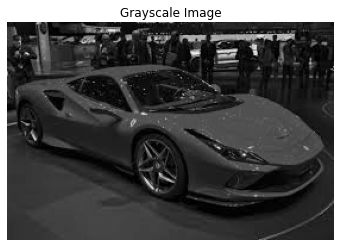

In [21]:
# 1.2. Convert the image to grayscale and display it

# Write your code below:


gray_img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)
plt.imshow(gray_img, cmap = "gray")
plt.axis("off") #remove axes ticks
plt.title('Grayscale Image')

### Exercise 2

2.1. Using your grayscale image from Exercise 1, display its grayscale histogram

2.2. Using your color image from Exercise 1, display its color histogram

2.3. Look at your histogram and think about how its pixels are distributed. What are some observations that you can make?

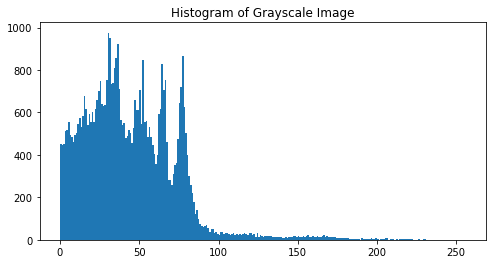

In [22]:
# 2.1. Using your grayscale image from Exercise 1, display its grayscale histogram  

# Write your code below:

rcParams['figure.figsize'] = 8,4
plt.hist(gray_img.ravel(),256,[0,256])
plt.title('Histogram of Grayscale Image')
plt.show()

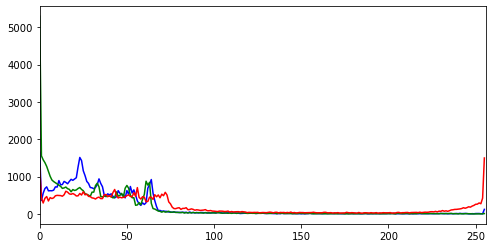

In [23]:
# 2.2. Using your color image from Exercise 1, display its color histogram  

# Write your code below:

rcParams['figure.figsize'] = 8, 4

colors = ('b','g','r')
for i,col in enumerate(colors):
    histr_color = cv2.calcHist([img],[i],None,[256],[0,256])
    plt.plot(histr_color,color = col)
    plt.xlim([0,256])
plt.show()

### Exercise 3

1.1. Download an image of your choosing, and display it

1.2. Convert the image to grayscale, and display it

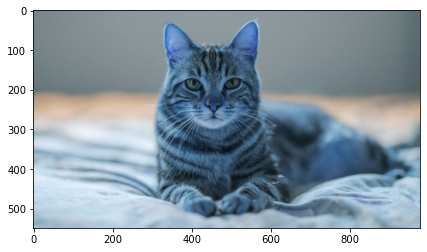

In [24]:
# 1.1. Download an image of your choosing and display it

# Write your code below:

import urllib.request

#Set the url and filename
cat_url = "https://ichef.bbci.co.uk/news/976/cpsprodpb/12A9B/production/_111434467_gettyimages-1143489763.jpg"
cat_filename = "cat.jpg"

urllib.request.urlretrieve(cat_url, cat_filename) # downloads file as "cat.jpg"

cat = cv2.imread(cat_filename)
plt.imshow(cat)

Text(0.5, 1.0, 'Grayscale Image')

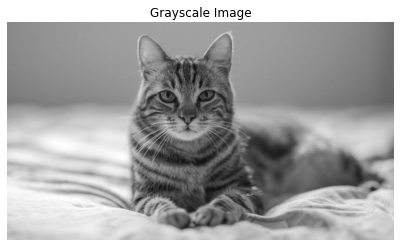

In [25]:
# 1.2. Convert the image to grayscale and display it

# Write your code below:

gray_cat = cv2.cvtColor(cat, cv2.COLOR_BGR2GRAY)

plt.imshow(gray_cat, cmap = 'gray')
plt.axis("off") #remove axes ticks
plt.title('Grayscale Image')

### Exercise 4

2.1. Using your grayscale image from Exercise 1, display its grayscale histogram

2.2. Using your color image from Exercise 1, display its color histogram

2.3. Look at your histogram and think about how its pixels are distributed. What are some observations that you can make?

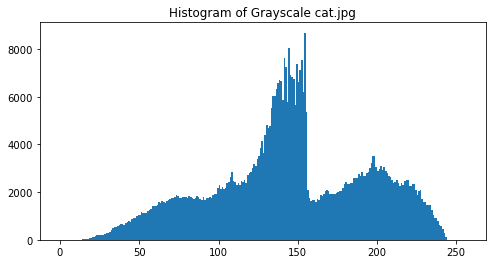

In [26]:
# 2.1. Using your grayscale image from Exercise 1, display its grayscale histogram  

# Write your code below:
rcParams['figure.figsize'] = 8,4

plt.hist(gray_cat.ravel(),256,[0,256])
plt.title('Histogram of Grayscale cat.jpg')
plt.show()

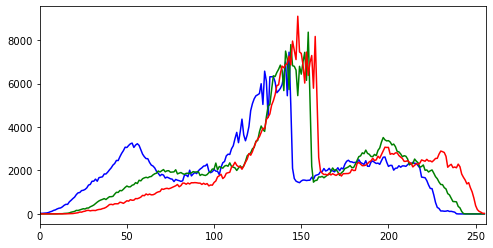

In [27]:
# 2.2. Using your color image from Exercise 1, display its color histogram  

# Write your code below:

rcParams['figure.figsize'] = 8, 4

color = ('b','g','r')
for i,col in enumerate(color):
    histr = cv2.calcHist([cat],[i],None,[256],[0,256])
    plt.plot(histr,color = col)
    plt.xlim([0,256])
plt.show()